<a href="https://colab.research.google.com/github/cecellhax/analises_covid19/blob/main/covid_ma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Anális dos dados da COVID-19 no estado do Maranhão**


# **1.   Testes realizados**



In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
covid_ma = pd.read_csv('https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/dados-ma.csv', encoding='latin1', sep=';')

In [4]:
covid_ma.head()

,ÿid,dataNotificacao,dataInicioSintomas,dataNascimento,sintomas,profissionalSaude,cbo,condicoes,estadoTeste,dataTeste,tipoTeste,resultadoTeste,paisOrigem,sexo,estado,estadoIBGE,municipio,municipioIBGE,origem,estadoNotificacao,estadoNotificacaoIBGE,municipioNotificacao,municipioNotificacaoIBGE,excluido,validado,idade,dataEncerramento,evolucaoCaso,classificacaoFinal
0,AbEVo5S4nX,2020-03-30T03:00:00.000Z,2020-03-29T03:00:00.000Z,undefined,Tosse,Sim,2235 - Enfermeiro,NaN,Coletado,2020-03-30T03:00:00.000Z,NaN,NaN,undefined,Masculino,MARANHÃO,21,São Luís,2111300.0,undefined,MARANHÃO,21.0,São Luís,2111300.0,undefined,undefined,55.0,NaN,NaN,NaN
1,ozHhVSzSdq,2020-04-06T13:17:27.512Z,2020-03-22T03:00:00.000Z,undefined,"Febre, Tosse, Dispneia, Outros",Não,NaN,NaN,Coletado,2020-04-06T03:00:00.000Z,NaN,NaN,undefined,Masculino,MARANHÃO,21,Imperatriz,2105302.0,undefined,MARANHÃO,21.0,Imperatriz,2105302.0,undefined,undefined,47.0,NaN,NaN,NaN
2,6KJS2Qdpq2,2020-04-01T03:00:00.000Z,2020-03-26T03:00:00.000Z,undefined,"Dor de Garganta, Dispneia, Febre, Tosse",Sim,2235 - Enfermeiro,NaN,Coletado,2020-04-02T03:00:00.000Z,NaN,NaN,undefined,Feminino,MARANHÃO,21,São Luís,2111300.0,undefined,MARANHÃO,21.0,São Luís,2111300.0,undefined,undefined,37.0,NaN,NaN,NaN
3,SXtw57busW,2020-04-01T03:00:00.000Z,2020-03-31T03:00:00.000Z,undefined,"Dispneia, Tosse",Não,NaN,NaN,Coletado,2020-04-01T03:00:00.000Z,NaN,NaN,undefined,Feminino,MARANHÃO,21,São José de Ribamar,2111201.0,undefined,MARANHÃO,21.0,São Luís,2111300.0,undefined,undefined,33.0,NaN,NaN,NaN
4,NgKU8QKx0X,2020-04-06T07:23:33.348Z,2020-04-04T04:00:00.000Z,undefined,"Tosse, Outros",Não,NaN,NaN,NaN,NaN,NaN,NaN,undefined,Masculino,MARANHÃO,21,São Luís,2111300.0,undefined,MARANHÃO,21.0,São Luís,2111300.0,undefined,undefined,56.0,NaN,NaN,NaN


In [7]:
testes_ma = covid_ma.value_counts('resultadoTeste').sum()

In [136]:
testes_ma

565226

In [8]:
covid_ma.value_counts('resultadoTeste')

resultadoTeste
Negativo                         309993
Positivo                         254967
Inconclusivo ou Indeterminado       266
dtype: int64

In [9]:
result_ma = covid_ma.value_counts('resultadoTeste')

In [93]:
result_ma = result_ma.drop('Inconclusivo ou Indeterminado')

In [94]:
result_ma

resultadoTeste
Negativo    309993
Positivo    254967
dtype: int64

**Profissionais da saú de infectados**

In [122]:
pi_ma = covid_ma.query('profissionalSaude == "Sim" & resultadoTeste == "Positivo"')

In [123]:
tpi_ma = pi_ma.value_counts('resultadoTeste')

In [124]:
tpi_ma

resultadoTeste
Positivo    10615
dtype: int64

# **São Luís**

In [10]:
covid_slz = covid_ma.query('municipio == "São Luís"')

In [11]:
covid_slz.head()

,ÿid,dataNotificacao,dataInicioSintomas,dataNascimento,sintomas,profissionalSaude,cbo,condicoes,estadoTeste,dataTeste,tipoTeste,resultadoTeste,paisOrigem,sexo,estado,estadoIBGE,municipio,municipioIBGE,origem,estadoNotificacao,estadoNotificacaoIBGE,municipioNotificacao,municipioNotificacaoIBGE,excluido,validado,idade,dataEncerramento,evolucaoCaso,classificacaoFinal
0,AbEVo5S4nX,2020-03-30T03:00:00.000Z,2020-03-29T03:00:00.000Z,undefined,Tosse,Sim,2235 - Enfermeiro,NaN,Coletado,2020-03-30T03:00:00.000Z,NaN,NaN,undefined,Masculino,MARANHÃO,21,São Luís,2111300.0,undefined,MARANHÃO,21.0,São Luís,2111300.0,undefined,undefined,55.0,NaN,NaN,NaN
2,6KJS2Qdpq2,2020-04-01T03:00:00.000Z,2020-03-26T03:00:00.000Z,undefined,"Dor de Garganta, Dispneia, Febre, Tosse",Sim,2235 - Enfermeiro,NaN,Coletado,2020-04-02T03:00:00.000Z,NaN,NaN,undefined,Feminino,MARANHÃO,21,São Luís,2111300.0,undefined,MARANHÃO,21.0,São Luís,2111300.0,undefined,undefined,37.0,NaN,NaN,NaN
4,NgKU8QKx0X,2020-04-06T07:23:33.348Z,2020-04-04T04:00:00.000Z,undefined,"Tosse, Outros",Não,NaN,NaN,NaN,NaN,NaN,NaN,undefined,Masculino,MARANHÃO,21,São Luís,2111300.0,undefined,MARANHÃO,21.0,São Luís,2111300.0,undefined,undefined,56.0,NaN,NaN,NaN
5,Y5rlV9HJRa,2020-04-06T13:31:04.344Z,2020-03-03T03:00:00.000Z,undefined,"Dor de Garganta, Dispneia, Febre, Tosse, Outros",Sim,3222 - Técnico ou Auxiliar em Enfermagem,NaN,Coletado,2020-04-06T03:00:00.000Z,NaN,NaN,undefined,Masculino,MARANHÃO,21,São Luís,2111300.0,undefined,MARANHÃO,21.0,São Luís,2111300.0,undefined,undefined,33.0,NaN,NaN,NaN
6,SepJKM9O3F,2020-04-06T13:17:10.116Z,2020-03-29T03:00:00.000Z,undefined,Tosse,Não,NaN,NaN,Coletado,2020-04-01T03:00:00.000Z,NaN,NaN,undefined,Feminino,MARANHÃO,21,São Luís,2111300.0,undefined,MARANHÃO,21.0,São Luís,2111300.0,undefined,undefined,63.0,NaN,NaN,NaN


In [13]:
testes_slz = covid_slz.value_counts('resultadoTeste').sum()

In [135]:
testes_slz

86384

In [14]:
covid_slz.value_counts('resultadoTeste')

resultadoTeste
Negativo                         58267
Positivo                         28097
Inconclusivo ou Indeterminado       20
dtype: int64

In [90]:
result_slz = covid_slz.value_counts('resultadoTeste')

In [91]:
result_slz = result_slz.drop('Inconclusivo ou Indeterminado')

In [92]:
result_slz

resultadoTeste
Negativo    58267
Positivo    28097
dtype: int64

**Profissionais da saúde infectado em São Luís**

In [126]:
pi_slz = covid_slz.query('profissionalSaude == "Sim" & resultadoTeste == "Positivo"')

In [128]:
tpi_slz = pi_slz.value_counts('resultadoTeste')

In [129]:
tpi_slz

resultadoTeste
Positivo    2786
dtype: int64

# **Açailândia**

In [16]:
covid_acai = covid_ma.query('municipio == "Açailândia"')

In [17]:
covid_acai.head()

,ÿid,dataNotificacao,dataInicioSintomas,dataNascimento,sintomas,profissionalSaude,cbo,condicoes,estadoTeste,dataTeste,tipoTeste,resultadoTeste,paisOrigem,sexo,estado,estadoIBGE,municipio,municipioIBGE,origem,estadoNotificacao,estadoNotificacaoIBGE,municipioNotificacao,municipioNotificacaoIBGE,excluido,validado,idade,dataEncerramento,evolucaoCaso,classificacaoFinal
72,HSeQP58XwJ,2020-04-05T03:00:00.000Z,2020-03-13T03:00:00.000Z,undefined,"Dor de Garganta, Dispneia, Tosse",Não,NaN,Doenças cardíacas crônicas,NaN,NaN,NaN,NaN,undefined,Masculino,MARANHÃO,21,Açailândia,2100055.0,undefined,MARANHÃO,21.0,Açailândia,2100055.0,undefined,undefined,45.0,NaN,NaN,NaN
373,0ggNmmd4d8,2020-04-04T03:00:00.000Z,2020-03-30T03:00:00.000Z,undefined,"Tosse, Febre, Dispneia",Não,NaN,Doenças respiratórias crônicas descompensadas,NaN,NaN,NaN,NaN,undefined,Masculino,MARANHÃO,21,Açailândia,2100055.0,undefined,MARANHÃO,21.0,Açailândia,2100055.0,undefined,undefined,40.0,NaN,NaN,NaN
720,XMTKArMD4Z,2020-04-03T20:15:20.670Z,2020-03-28T03:00:00.000Z,undefined,"Febre,Tosse,Dispneia",Não,NaN,NaN,NaN,NaN,NaN,NaN,undefined,Feminino,MARANHÃO,21,Açailândia,2100055.0,undefined,MARANHÃO,21.0,Açailândia,2100055.0,undefined,undefined,39.0,NaN,NaN,NaN
795,FrXtr4D2Me,2020-04-04T16:01:30.910Z,2020-04-04T03:00:00.000Z,undefined,"Dor de Garganta,Dispneia,Febre",Não,NaN,NaN,NaN,NaN,NaN,NaN,undefined,Feminino,MARANHÃO,21,Açailândia,2100055.0,undefined,MARANHÃO,21.0,Açailândia,2100055.0,undefined,undefined,29.0,NaN,NaN,NaN
825,DYMCe6QVBa,2020-04-05T15:47:12.970Z,2020-03-24T03:00:00.000Z,undefined,"Tosse, Febre, Dispneia, Dor de Garganta",Sim,3222 - Técnico ou Auxiliar em Enfermagem,NaN,Solicitado,NaN,NaN,NaN,undefined,Feminino,MARANHÃO,21,Açailândia,2100055.0,undefined,MARANHÃO,21.0,Açailândia,2100055.0,undefined,undefined,45.0,NaN,NaN,NaN


In [19]:
testes_acai = covid_acai.value_counts('resultadoTeste').sum()

In [131]:
testes_acai

11787

In [21]:
result_acai = covid_acai.value_counts('resultadoTeste')

In [130]:
result_acai

resultadoTeste
Negativo    7086
Positivo    4701
dtype: int64

**Profissionais da saúde infectado em Açailândia**

In [132]:
pi_acai = covid_acai.query('profissionalSaude == "Sim" & resultadoTeste == "Positivo"')

In [133]:
tpi_acai = pi_acai.value_counts('resultadoTeste')

In [134]:
tpi_acai

resultadoTeste
Positivo    40
dtype: int64

# **Imperatriz**

In [22]:
covid_itz = covid_ma.query('municipio == "Imperatriz"')

In [23]:
covid_itz.head()

,ÿid,dataNotificacao,dataInicioSintomas,dataNascimento,sintomas,profissionalSaude,cbo,condicoes,estadoTeste,dataTeste,tipoTeste,resultadoTeste,paisOrigem,sexo,estado,estadoIBGE,municipio,municipioIBGE,origem,estadoNotificacao,estadoNotificacaoIBGE,municipioNotificacao,municipioNotificacaoIBGE,excluido,validado,idade,dataEncerramento,evolucaoCaso,classificacaoFinal
1,ozHhVSzSdq,2020-04-06T13:17:27.512Z,2020-03-22T03:00:00.000Z,undefined,"Febre, Tosse, Dispneia, Outros",Não,NaN,NaN,Coletado,2020-04-06T03:00:00.000Z,NaN,NaN,undefined,Masculino,MARANHÃO,21,Imperatriz,2105302.0,undefined,MARANHÃO,21.0,Imperatriz,2105302.0,undefined,undefined,47.0,NaN,NaN,NaN
52,C0ya737eMv,2020-04-06T03:00:00.000Z,2020-03-30T03:00:00.000Z,undefined,"Dor de Garganta, Febre, Tosse",Não,NaN,NaN,NaN,NaN,NaN,NaN,undefined,Feminino,MARANHÃO,21,Imperatriz,2105302.0,undefined,MARANHÃO,21.0,Governador Edison Lobão,2104552.0,undefined,undefined,26.0,NaN,NaN,NaN
57,JUzKNcyiIH,2020-04-06T03:00:00.000Z,2020-04-05T03:00:00.000Z,undefined,Tosse,Não,NaN,NaN,NaN,NaN,NaN,NaN,undefined,Masculino,MARANHÃO,21,Imperatriz,2105302.0,undefined,MARANHÃO,21.0,Governador Edison Lobão,2104552.0,undefined,undefined,30.0,NaN,NaN,NaN
63,ECYrdK7ZN6,2020-04-06T03:00:00.000Z,2020-04-04T03:00:00.000Z,undefined,"Dispneia, Febre",Não,NaN,NaN,NaN,NaN,NaN,NaN,undefined,Feminino,MARANHÃO,21,Imperatriz,2105302.0,undefined,MARANHÃO,21.0,Governador Edison Lobão,2104552.0,undefined,undefined,41.0,NaN,NaN,NaN
164,SsE6bE0dw8,2020-04-06T18:04:25.570Z,2020-04-06T03:00:00.000Z,undefined,"Outros, Dispneia",Sim,225 - Médico,Doenças cardíacas crônicas,Coletado,2020-04-06T03:00:00.000Z,NaN,NaN,undefined,Masculino,MARANHÃO,21,Imperatriz,2105302.0,undefined,MARANHÃO,21.0,Imperatriz,2105302.0,undefined,undefined,70.0,NaN,NaN,NaN


In [45]:
testes_itz = covid_itz.value_counts('resultadoTeste').sum()

In [46]:
testes_itz

46176

In [87]:
result_itz = covid_itz.value_counts('resultadoTeste')   

In [88]:
result_itz = result_itz.drop('Inconclusivo ou Indeterminado')

In [89]:
result_itz

resultadoTeste
Negativo    29374
Positivo    16785
dtype: int64

**Profissionais da saúde infectado em Imperatriz**

In [137]:
pi_itz = covid_itz.query('profissionalSaude == "Sim" & resultadoTeste == "Positivo"')

In [138]:
tpi_itz = pi_itz.value_counts('resultadoTeste')

In [139]:
tpi_itz

resultadoTeste
Positivo    703
dtype: int64

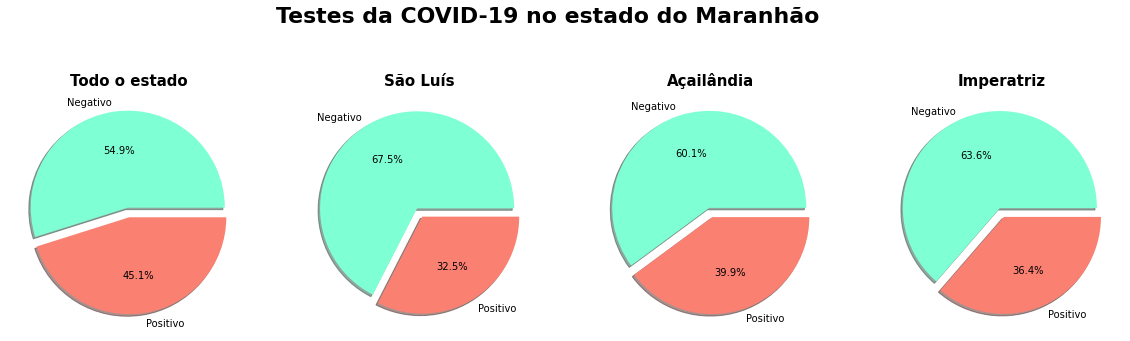

In [116]:
cores = ['#7FFFD4', '#FA8072']
fig,(ax1, ax2, ax3, ax4)= plt.subplots(1,4, figsize = (20,6))
plt.suptitle('Testes da COVID-19 no estado do Maranhão', weight = 'bold', size = 22)

ax1.pie(result_ma, labels=result_ma.index, autopct = '%1.1f%%', shadow=True, explode=(0.05,0.05), colors=cores)
ax1.set_title('Todo o estado', weight = 'bold', size = 15)

ax2.pie(result_slz, labels=result_slz.index, autopct='%1.1f%%', shadow=True, explode=(0.05,0.05), colors=cores)
ax2.set_title('São Luís', weight = 'bold', size = 15)

ax3.pie(result_acai, labels=result_acai.index, autopct='%1.1f%%', shadow=True, explode=(0.05,0.05), colors=cores)
ax3.set_title('Açailândia', weight = 'bold', size = 15)

ax4.pie(result_itz, labels=result_itz.index, autopct='%1.1f%%', shadow=True, explode=(0.05,0.05), colors=cores)
ax4.set_title('Imperatriz', weight = 'bold', size = 15)

plt.show()